In [1]:
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd

In [2]:
# load the graph
# The graph is an extraction from LinkedIn Social Network
G = nx.read_gexf("mediumLinkedin.gexf")

# Exploration of the graph : relational data understanding

In [3]:
# Networkx short summary of information for the graph g
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 811
Number of edges 1597
Average degree 3.938347718865598


In [4]:
G.number_of_nodes()

811

In [5]:
G.number_of_edges()

1597

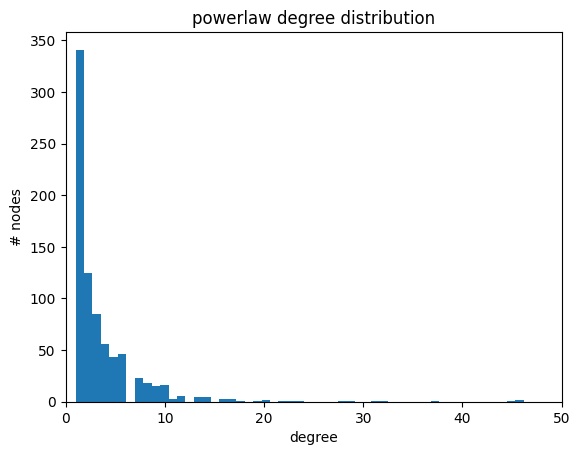

In [6]:
plt.figure(num=None)
fig = plt.figure(1)
degree_sequence=[d for n, d in G.degree()] 
plt.hist(degree_sequence, bins='auto')  
plt.title("powerlaw degree distribution")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.xlim(0,50)
plt.show()
pylab.close()
del fig

In [7]:
G.degree()


DegreeView({'U27476': 8, 'U4665': 10, 'U1313': 4, 'U8804': 1, 'U14078': 4, 'U9628': 5, 'U9721': 2, 'U2649': 2, 'U27759': 1, 'U7310': 1, 'U22859': 1, 'U1417': 1, 'U25611': 3, 'U24095': 4, 'U3895': 8, 'U13005': 2, 'U2620': 1, 'U5976': 7, 'U4249': 16, 'U9140': 3, 'U16112': 3, 'U27776': 1, 'U27708': 2, 'U15284': 5, 'U24549': 1, 'U18514': 20, 'U15272': 6, 'U3933': 3, 'U15946': 6, 'U25630': 3, 'U25632': 1, 'U22031': 1, 'U11562': 8, 'U22071': 1, 'U15292': 9, 'U7912': 17, 'U22018': 1, 'U18925': 1, 'U7136': 1, 'U14498': 4, 'U21990': 1, 'U3927': 2, 'U1381': 1, 'U22087': 1, 'U27804': 1, 'U24252': 3, 'U7355': 6, 'U12969': 5, 'U2180': 5, 'U11815': 4, 'U4447': 1, 'U27679': 1, 'U27582': 4, 'U27464': 2, 'U8029': 1, 'U1075': 1, 'U24259': 1, 'U18564': 1, 'U27283': 10, 'U11575': 3, 'U14507': 4, 'U27477': 5, 'U25619': 1, 'U2661': 1, 'U24143': 3, 'U8000': 1, 'U22015': 1, 'U24152': 3, 'U11591': 10, 'U27585': 3, 'U27498': 2, 'U9663': 2, 'U14520': 5, 'U1441': 1, 'U2714': 1, 'U8051': 1, 'U27300': 10, 'U9149': 

In [8]:
# The 10 nodes with the highest degree 
sorted_nodes_by_degree=sorted([(n,d) for n, d in G.degree()], key=lambda t: t[1])
print("The 5 nodes with the highest degree are: %s" % str(sorted_nodes_by_degree[-5:]))
print("The 5 next nodes with the highest degree are: %s" % str(sorted_nodes_by_degree[-10:-5]))

The 5 nodes with the highest degree are: [('U7972', 46), ('U8670', 46), ('U1045', 58), ('U7024', 74), ('U27287', 122)]
The 5 next nodes with the highest degree are: [('U4485', 29), ('U5977', 31), ('U15267', 32), ('U4562', 37), ('U7091', 45)]


In [9]:
# We have know the 10 biggest influencers
# That meens that thoes nodes are the one's which has the most edges to others

# We want to know now who are the neigbours

In [10]:
sorted_nodes_by_degree_only_number = [sorted_nodes_by_degree[-i][0] for i in range(1,6)]
sorted_5_next_nodes_by_degree_only_number = [sorted_nodes_by_degree[-i][0] for i in range(6,11)]
print(sorted_nodes_by_degree_only_number)
print(sorted_5_next_nodes_by_degree_only_number)

['U27287', 'U7024', 'U1045', 'U8670', 'U7972']
['U7091', 'U4562', 'U15267', 'U5977', 'U4485']


In [11]:
#Find the neighbours 
for i in sorted_nodes_by_degree_only_number:
  print ('\nThe neigbours of ' + str(i) + ' are')
  print('\n*********\n')

  for n in G.neighbors(i):
      print(n)


The neigbours of U27287 are

*********

U27476
U4665
U2649
U27759
U24095
U27776
U27708
U24549
U27804
U27679
U27582
U27464
U27283
U27477
U11591
U27585
U27498
U27300
U27553
U24080
U27460
U27711
U2625
U27661
U27752
U27758
U27657
U27676
U27636
U27463
U27588
U27614
U27617
U27541
U27604
U27756
U27748
U27577
U27499
U2656
U27518
U27721
U27473
U27687
U24084
U27279
U26952
U27608
U27456
U7202
U27634
U27507
U27779
U27649
U27785
U27471
U27746
U27753
U27726
U27691
U27792
U2627
U27698
U27801
U24092
U27642
U27772
U24064
U11597
U27742
U27600
U27525
U27515
U24045
U4628
U27663
U27618
U27532
U27692
U27763
U27622
U16127
U4562
U27791
U27648
U27635
U27516
U27569
U27738
U27674
U27707
U27542
U27332
U27508
U27289
U24184
U27494
U11580
U27575
U7319
U27777
U11559
U25563
U7256
U11563
U27656
U4568
U27557
U11566
U27737
U27761
U27549
U27602
U27627
U24504
U27603
U27784
U27613
U27798
U27475
U27704
U4586

The neigbours of U7024 are

*********

U7310
U7136
U7192
U7285
U7087
U7226
U7213
U7104
U7279
U7151
U7153
U7194
U7227

# Find inluencers

In [12]:
# What about our 5 highest degree nodes?
# The higher the clustering coefficient of a node, the more strongly this node is grouped with its neighbors in the network.
# We wqnt to find nodes with a hight degree but a low coeficient 

nx.clustering(G,sorted_nodes_by_degree_only_number)

{'U27287': 0.023438558460913157,
 'U7024': 0.0011106997408367272,
 'U1045': 0.011494252873563218,
 'U8670': 0.035748792270531404,
 'U7972': 0.02995169082125604}

In [13]:
#For the 5 next nodes 

nx.clustering(G,sorted_5_next_nodes_by_degree_only_number)

{'U7091': 0.00808080808080808,
 'U4562': 0.08258258258258258,
 'U15267': 0.17540322580645162,
 'U5977': 0.15913978494623657,
 'U4485': 0.07389162561576355}

In [14]:
# The node U7091 is interresting because it is very little connected to the other nodes

In [15]:
#The  algorithm calculates each node's score based on the sum of the scores of the nodes linked to it, weighted by the weight of the links.

pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
    print(f"{i+1}. {sorted_pagerank[i][0]} avec un score de PageRank de {sorted_pagerank[i][1]:.4f}")

1. U7024 avec un score de PageRank de 0.0371
2. U27287 avec un score de PageRank de 0.0345
3. U1045 avec un score de PageRank de 0.0257
4. U7091 avec un score de PageRank de 0.0214
5. U7972 avec un score de PageRank de 0.0168
6. U8670 avec un score de PageRank de 0.0138
7. U22747 avec un score de PageRank de 0.0109
8. U4562 avec un score de PageRank de 0.0094
9. U4485 avec un score de PageRank de 0.0086
10. U14068 avec un score de PageRank de 0.0070


In [16]:
for i in range(5):
    print(sorted_pagerank[i][0])


U7024
U27287
U1045
U7091
U7972


In [17]:
infl = ('U7024', 'U27287', 'U1045', 'U7091', 'U7972')

In [18]:
# Finally the node U7091 is better than U8670, we have our 5 influencers 

In [20]:
loc = pd.read_csv('/content/location (1).csv')
loc

,Unnamed: 0,name,location
0,0,U27476,san francisco bay area
1,1,U4665,NaN
2,2,U14078,urbana-champaign illinois area
3,3,U9628,urbana-champaign illinois area
4,4,U9721,springfield illinois area
...,...,...,...
470,470,U14564,urbana-champaign illinois area
471,471,U14112,urbana-champaign illinois area
472,472,U4586,urbana-champaign illinois area
473,473,U18520,NaN


In [21]:
nodes_bay_area = loc['name'][loc['location'] == 'san francisco bay area']
nodes_bay_area

0      U27476
6      U24095
42      U4600
56     U27460
93     U27588
114    U24071
230     U2691
241    U15308
267    U28776
268     U2627
301    U27515
309     U4628
313    U27532
315    U15269
397    U16084
399    U22817
415    U27575
434    U27603
450    U27613
458    U16098
Name: name, dtype: object

In [22]:
nodes_bay_area_list = nodes_bay_area.values.tolist()
nodes_bay_area_list

['U27476',
 'U24095',
 'U4600',
 'U27460',
 'U27588',
 'U24071',
 'U2691',
 'U15308',
 'U28776',
 'U2627',
 'U27515',
 'U4628',
 'U27532',
 'U15269',
 'U16084',
 'U22817',
 'U27575',
 'U27603',
 'U27613',
 'U16098']

In [23]:
#Lets see if the 5 biggest influencers are in the bay area
similar = ()
for i in range(len(infl)):
  if infl[i] in nodes_bay_area_list:
    similar.append(i)
  else:
    None
  print(similar)


()
()
()
()
()


In [ ]:
#there is any influencers in the bay area

# Conclusion

Reformulate the problem and bring your solution here